<a href="https://colab.research.google.com/github/hobson/talks/blob/master/Lesson_3_Multivariate_Regression_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Array Math in Python

In Python there are several ways to create an array, depending on what you want to do with the array. 
The most general approach is to store your array as `list()`.  
Say you want to create a variable called `x`, and you want it to store an arrary (list) of the values 2, 4, 6, and 8, in that order: 

In [1]:
x = [2, 4, 6, 8]
x

[2, 4, 6, 8]


You can use a list of lists to store any table of values (strings, numbers, whatever).  
And you can store pairs of values like patient heights and weights as list of lists.  
Here is a list of lists containing the first four rows of height and weight data in your spreadsheet data science exercise.  
You will normally load data from a file or database.  
Later in this exercise you will see how to load a table of height, weight, gender, and age information from a large file on the Internet.  
You won't normally create data like this manually.  

In [2]:
height_weight_lists = [[67.0, 167.9], [63.1, 124.8], [64.4, 162.5], [66.4, 162.0]]
height_weight_lists

[[67.0, 167.9], [63.1, 124.8], [64.4, 162.5], [66.4, 162.0]]

In [3]:
print('height, weight')
for row in height_weight_lists:
    print(row)

height, weight
[67.0, 167.9]
[63.1, 124.8]
[64.4, 162.5]
[66.4, 162.0]


There are two packages that will make it easier for you to perform math, including machine learning on tables of data.  

1. `numpy`
2. `pandas`

We normally use the abbreviated variable name `np` to refer to the `numpy` package.  
And we use the abbrevation `pd` for the `pandas` package:

In [4]:
import numpy as np
import pandas as pd

You can create numpy arrays from any sequence of values.  
Here's how to turn your list of lists for heights and weights into a numpy array:

In [5]:
height_weight_array = np.array(height_weight_lists)
height_weight_array

array([[ 67. , 167.9],
       [ 63.1, 124.8],
       [ 64.4, 162.5],
       [ 66.4, 162. ]])

You can see the size and shape of this 2D array with the `.shape` attribute that is attached to any numpy array.  
This will list the number of rows first, then the number of columns.  

In [6]:
height_weight_array.shape

(4, 2)

So your `height_weight_array` data has 4 columns and 2 columns (one each for height and weight).

But, having to remember which column is which, height or weight, can be tricky.  
And when you have thousands of rows and hundreds of columns, it can become impossible.  
That's where pandas comes in to save the day.   
A pandas DataFrame is a numpy 2D array (table) with labels for the columns and rows that make it a lot easier to keep track of your data:


In [7]:
df = pd.DataFrame(height_weight_lists)
df

,0,1
0,67.0,167.9
1,63.1,124.8
2,64.4,162.5
3,66.4,162.0


You might be saying to yourself that the labels `0` and `1` for the columns and 0, 1, 2, 3, 4 for the rows aren't that helpful.  
You can use strings for these labels too:


In [8]:
df.columns = ['height', 'weight']
df

,height,weight
0,67.0,167.9
1,63.1,124.8
2,64.4,162.5
3,66.4,162.0


You could even give each row a name or ID number, if you like:

In [9]:
df.index = ['Al', 'Beth', 'Casey', 'Deb']
df

,height,weight
Al,67.0,167.9
Beth,63.1,124.8
Casey,64.4,162.5
Deb,66.4,162.0


And most of the data files you'll be loading will already have the appropriate labels for the columns in the first row of the CSV file.  
And the first column of a CSV file usually contains the index.  
Here's how you use pandas to read in a CSV file from the Internet.  
Here you will load the same data you used in the Spreadsheet Data Science excercise:   

In [10]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/totalgood/dsdh/master/data/gender-height-weight.csv',
    index_col=0)
df

,Gender,Height,Weight
PatientID,,,
0,Male,67.038865,167.912793
1,Female,63.085162,124.829874
2,Male,64.366677,162.495082
3,Female,66.410908,161.991386
4,Female,64.798961,152.828706
...,...,...,...
9995,Male,68.092965,169.936601
9996,Male,69.304769,187.551649
9997,Female,62.553731,132.006233


Here's that df.describe that you heard about in the lecture:

In [11]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


And here's how you train a linear regression like the one you fit by hand in the spreadsheet exercise:  

In [12]:
X = df[['Height']]
X

,Height
PatientID,
0,67.038865
1,63.085162
2,64.366677
3,66.410908
4,64.798961
...,...
9995,68.092965
9996,69.304769
9997,62.553731


In [13]:
y = df['Weight']
y

PatientID
0       167.912793
1       124.829874
2       162.495082
3       161.991386
4       152.828706
           ...    
9995    169.936601
9996    187.551649
9997    132.006233
9998    156.537008
9999    216.923291
Name: Weight, Length: 10000, dtype: float64

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [15]:
model.fit(X, y)
y_predictions = model.predict(X)
y_predictions

array([166.62101425, 136.10915189, 145.99896695, ..., 132.00794618,
       160.20399935, 200.32317715])

And like you did in the spreadsheet, you would like to know the RMSE for your linear regression model:

In [16]:
e = y_predictions - y
rmse = np.sqrt(np.mean(e**2))
rmse

12.218571272826035

And what was the coefficient (slope) for this fit?

In [17]:
model.coef_

array([7.71728764])

And you can check to see if your intercept for the spreadsheet was similar to this more precise value from the python LinearRegression:

In [18]:
model.intercept_

-350.7371918121371

The real power of python shines through when you want to fit a model on many different variables.  
This is called a multivariate regression.  
So let's load a historical dataset with many different variables that might contribute to the weight of patients.  
In the 1960's Nancy Howell collected age, gender, height, and weight data from about 800 of the [Kung San](en.wikipedia.org/wiki/Kung San) people:

In [19]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/totalgood/dsdh/master/data/age-alive-male-height-weight.csv',
    index_col=0)
df

,age.at.death,age,alive,male,height,weight
0,NaN,63.0,1,1.0,151.765,47.825606
1,NaN,63.0,1,0.0,139.700,36.485807
2,NaN,65.0,1,0.0,136.525,31.864838
3,72.0,72.0,0,0.0,NaN,NaN
4,NaN,41.0,1,1.0,156.845,53.041914
...,...,...,...,...,...,...
841,NaN,23.0,1,0.0,NaN,NaN
842,NaN,4.0,1,1.0,NaN,NaN
843,NaN,1.0,1,0.0,NaN,NaN
844,NaN,38.0,1,0.0,NaN,NaN


This dataset is typical of real world datasets.  
It contains a lot of missing values.  
You will need to fill or ignore the NaN values before you can do the math on them for linear regression:

In [20]:
df.columns

Index(['age.at.death', 'age', 'alive', 'male', 'height', 'weight'], dtype='object')

In [30]:
missing_weight = df['weight'].isna()  # .isna() checks to see if the elements are `NaN` or not (True or False)
missing_weight

0      False
1      False
2      False
3       True
4      False
       ...  
841     True
842     True
843     True
844     True
845     True
Name: weight, Length: 846, dtype: bool

In [22]:
df_clean = df[missing_weight == False].copy()
df_clean

,age.at.death,age,alive,male,height,weight
0,NaN,63.0,1,1.0,151.765,47.825606
1,NaN,63.0,1,0.0,139.700,36.485807
2,NaN,65.0,1,0.0,136.525,31.864838
4,NaN,41.0,1,1.0,156.845,53.041914
5,NaN,51.0,1,0.0,145.415,41.276872
...,...,...,...,...,...,...
817,NaN,17.0,1,1.0,145.415,31.127751
826,NaN,31.0,1,1.0,162.560,52.163080
827,NaN,21.0,1,0.0,156.210,54.062497
828,NaN,0.0,1,1.0,71.120,8.051258


In [23]:
X = df_clean[['age', 'alive', 'male', 'height']]
X.shape

(614, 4)

In [24]:
y = df_clean['weight']
y.shape

(614,)

In [25]:
model = LinearRegression()
model

LinearRegression()

In [26]:
model.intercept_

AttributeError: ignored

As you can see in the error message above, your model will not have an intercept (or slope) until you train your model (fit the model to the data): 

In [27]:
model.fit(X, y)
model

ValueError: ignored

It looks like you need to clean up a few more NaNs in your data. You can count the NaNs by summing up this .`.isna().sum()` output. True = 1 and False = 0. So the sum of the `.isna()` will count the NaNs in each column.

In [28]:
X.isna().sum()

age        2
alive      0
male       0
height    69
dtype: int64

In [29]:
df_clean.isna().sum()

age.at.death    574
age               2
alive             0
male              0
height           69
weight            0
dtype: int64

In [31]:
df_clean = df[df['weight'].notnull()].copy()
df_clean = df_clean[df_clean['height'].notnull()].copy()
df_clean = df_clean[df_clean['age'].notnull()].copy()
df_clean.isnull().sum()

age.at.death    508
age               0
alive             0
male              0
height            0
weight            0
dtype: int64

That's better.  
Only your 'age.at.death' column has a lot of missing values.  
That's expected.  
You will ignore that column when you fit (train) your Linear Regression: 

In [32]:
X = df_clean[['age', 'alive', 'male', 'height']].copy()
X.shape

(544, 4)

In [33]:
y = df_clean['weight']
y.shape

(544,)

You now have only about 540 rows of valid data rather the 800 rows you started with.  
See if you can train a model on these new cleaned up X and y variable.

In [34]:
# model = Lin...
# model.fit(...)

In [35]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [36]:
model.intercept_

-33.66963404259091

In [37]:
model.coef_

array([0.06664136, 2.55666321, 0.9565331 , 0.46639419])

Now calculate the RMSE for your model. You need to uncomment the lines of code that have the hash symbol (`#`) at the beginning. You will also need to replace the elipses (`...`) with your own Python code. Search through the code above to find where you used a `LinearRegression` object to make predictions. Alternatively, run the command `help(model)` in a new cell. This will give you the documentation for the `LinearRegression` object that is in the variable named `model`. You can also duckup (use the search engine `duck.com` or `you.com`) to find the scikit-learn documentation for the `LinearRegression` class.

In [38]:
# y_pred = ...
# e = y_pred - y
# rmse = np.sqrt(np.m...)

In [39]:
np.sqrt(np.mean((y_pred - y)**2))

NameError: ignored

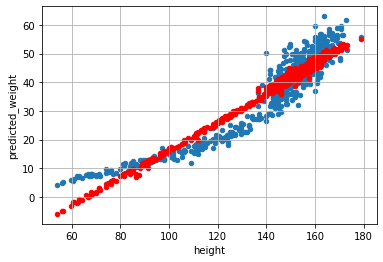

In [ ]:
from matplotlib import pyplot as plt
ax = df.plot(kind='scatter', x='height', y='weight')
df['predicted_weight'] = pd.Series(y_pred, index=X.index)
df['residual_error'] = pd.Series(y_pred - y, index=X.index)
ax = df.plot(kind='scatter', c='r', x='height', y='predicted_weight', ax=ax)
plt.grid()

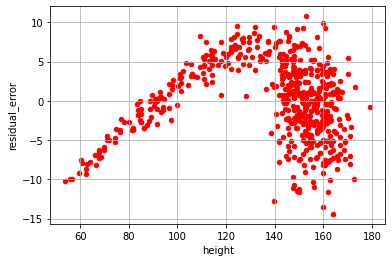

In [ ]:
df.plot(kind='scatter', x='height', y='residual_error', c='r')
plt.grid()

If you remember your algebra and calculus class from high school you might recognize the upside down U-shape for the red residual points as a inverted parabola.  
The equation for a parabola is:


$y = m_2 \cdot x ^ 2$

For your regression that includes a linear regression and a quadratic (parabolic) regression you will combine the equations for a line a polynomial into a polynomial:

$y = m_2 \cdot x ^ 2 + m_1 \cdot x + m_0$

In [ ]:
X['squared_height'] = X['height'].copy() ** 2
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X)
np.sqrt(np.mean((y_pred - y)**2))

3.863408800972511

In [ ]:
model.coef_

array([ 0.03156838,  1.66494225, -0.9891423 , -0.51284303,  0.00414452])

In [ ]:
pd.Series(model.coef_, index=X.columns)

age               0.031568
alive             1.664942
male             -0.989142
height           -0.512843
squared_height    0.004145
dtype: float64

In [ ]:
model.intercept_

22.12238403921652

You may also find that sometimes a `np.sqrt()` feature can help.  
A person's height and weight grow quickly when they are young and then slow down and level off after one's teenage years.  
We can approximate this curve with `np.sqrt(age)`:

In [ ]:
X['sqrt_age'] = np.sqrt(X['age'])

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X)
np.sqrt(np.mean((y_pred - y)**2))

3.7700880777251964

In [ ]:
pd.Series(model.coef_, index=X.columns)

age              -0.333068
alive             1.051882
male             -0.537382
height           -0.816357
squared_height    0.004960
sqrt_age          4.523418
dtype: float64

It doesn't look like this guess at a sqrt feature helped much.  
This is the challenge of Data Science and Machine Learning.  
It is called Feature Engineering when you create equations and formulas to define features for your model.  
And this is the promise of Deep Learning, which you will discover in later lessons.  
Neural Networks can try many feature combinations and take care of most of the feature engineering tasks for you automatically.  